In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import os

In [4]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
tf.test.is_gpu_available()

False

In [12]:
# Size of our input images
SIZE = 128
# Batch size for data generators
batch_size = 64

# Data generators setup
datagen = ImageDataGenerator(rescale=1./255)

# New directory paths
train_dir = r'C:\Users\Januka\Documents\data\cell_images2\uninfected_train'
validation_dir = r'C:\Users\Januka\Documents\data\cell_images2\uninfected_test'
anomaly_dir = r'C:\Users\Januka\Documents\data\cell_images2\Parasitized'


In [13]:
# Print directory contents for debugging
#print("Contents of train directory:")
#print(os.listdir(train_dir))
#print("Contents of validation directory:")
#print(os.listdir(validation_dir))
#print("Contents of anomaly directory:")
#print(os.listdir(anomaly_dir))

In [14]:

# Train data generator
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(SIZE, SIZE),
    batch_size=BATCH_SIZE,
    class_mode='input'
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
)

# Anomaly data generator
anomaly_generator = datagen.flow_from_directory(
    anomaly_dir,
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
)

Found 13338 images belonging to 1 classes.
Found 441 images belonging to 1 classes.
Found 13779 images belonging to 1 classes.


In [15]:
print("Number of images in train directory:", len(train_generator.filenames))
print("Number of images in validation directory:", len(validation_generator.filenames))
print("Number of images in anomaly directory:", len(anomaly_generator.filenames))

Number of images in train directory: 13338
Number of images in validation directory: 441
Number of images in anomaly directory: 13779


In [16]:
#Define the autoencoder. 
#Try to make the bottleneck layer size as small as possible to make it easy for
#density calculations and also picking appropriate thresholds. 

#Encoder
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

#Decoder
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 16)       

In [17]:
# Print shape of a batch of images from the training generator
batch_images, _ = train_generator.next()
print("Training batch shape:", batch_images.shape)

# Print shape of a batch of images from the validation generator
batch_images, _ = validation_generator.next()
print("Validation batch shape:", batch_images.shape)

# Print shape of a batch of images from the anomaly generator
batch_images, _ = anomaly_generator.next()
print("Anomaly batch shape:", batch_images.shape)

Training batch shape: (64, 128, 128, 3)
Validation batch shape: (64, 128, 128, 3)
Anomaly batch shape: (64, 128, 128, 3)


In [18]:
#Fit the model. 
history = model.fit(
        train_generator,
        steps_per_epoch= 500 // batch_size,
        epochs=1000,
        validation_data=validation_generator,
        validation_steps=75 // batch_size,
        shuffle = True)

Epoch 1/1000
7/7 [==============================] - 24s 3s/step - loss: 0.0866 - mse: 0.0866 - val_loss: 0.0736 - val_mse: 0.0736
Epoch 2/1000
7/7 [==============================] - 16s 2s/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0388 - val_mse: 0.0388
Epoch 3/1000
7/7 [==============================] - 16s 2s/step - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 4/1000
7/7 [==============================] - 16s 2s/step - loss: 0.0212 - mse: 0.0212 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 5/1000
7/7 [==============================] - 16s 2s/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 6/1000
7/7 [==============================] - 18s 3s/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 7/1000
7/7 [==============================] - 17s 2s/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 8/1000
7/7 [==============================] - 17s 2s/step - loss: 0.0121 - mse: 0.01

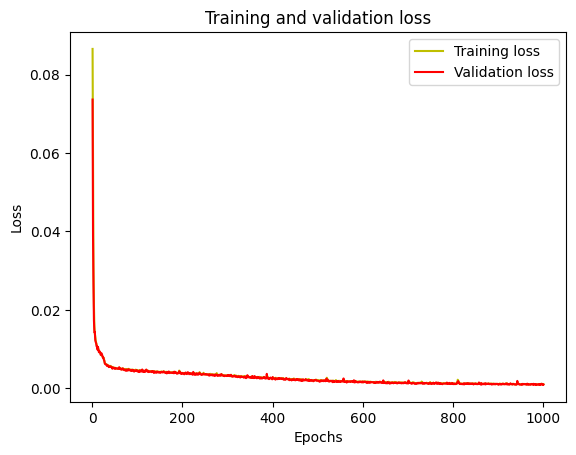

In [19]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
# Get all batches generated by the datagen and pick a batch for prediction
#Just to test the model. 
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= train_generator.batch_index:   #gets each generated batch of size batch_size
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

predicted = model.predict(data_batch[0])  #Predict on the first batch of images


2/2 [==============================] - 1s 211ms/step


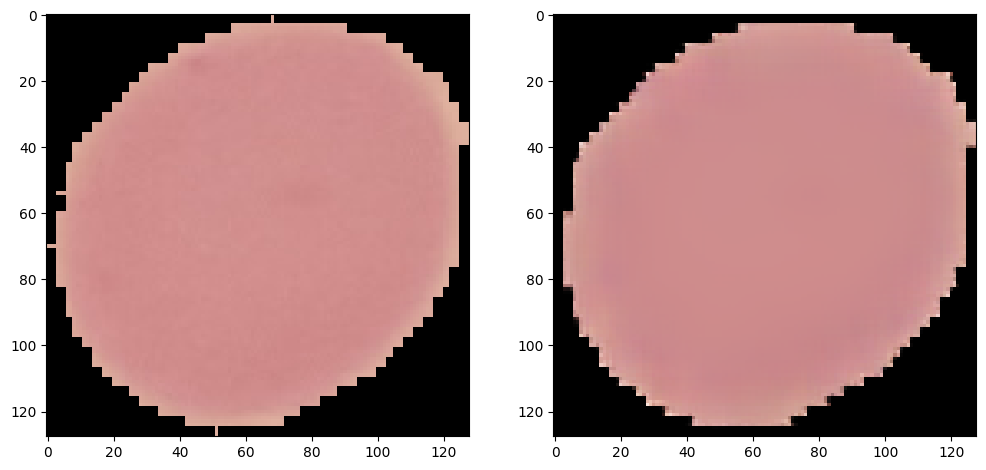

In [21]:
#Sanity check, view few images and corresponding reconstructions
image_number = random.randint(0, predicted.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(data_batch[0][image_number])
plt.subplot(122)
plt.imshow(predicted[image_number])
plt.show()

In [24]:
#Let us examine the reconstruction error between our validation data (good/normal images)
# and the anomaly images
validation_error = model.evaluate_generator(validation_generator)
anomaly_error = model.evaluate_generator(anomaly_generator)

print("Recon. error for the validation (normal) data is: ", validation_error)
print("Recon. error for the anomaly data is: ", anomaly_error)


C:\Users\Januka\AppData\Local\Temp\ipykernel_19704\4017806513.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  validation_error = model.evaluate_generator(validation_generator)
C:\Users\Januka\AppData\Local\Temp\ipykernel_19704\4017806513.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  anomaly_error = model.evaluate_generator(anomaly_generator)


Recon. error for the validation (normal) data is:  [0.000967883039265871, 0.000967883039265871]
Recon. error for the anomaly data is:  [0.0015650728018954396, 0.0015650728018954396]


In [25]:
#Let us extract (or build) the encoder network, with trained weights.
#This is used to get the compressed output (latent space) of the input image. 
#The compressed output is then used to calculate the KDE

encoder_model = Sequential()
encoder_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3), weights=model.layers[0].get_weights()) )
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', weights=model.layers[2].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(16, (3, 3), activation='relu', padding='same', weights=model.layers[4].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 16)       

########################################################

In [26]:
# Calculate KDE using sklearn
from sklearn.neighbors import KernelDensity

In [27]:
#Get encoded output of input images = Latent space
encoded_images = encoder_model.predict_generator(train_generator)

# Flatten the encoder output because KDE from sklearn takes 1D vectors as input
encoder_output_shape = encoder_model.output_shape #Here, we have 16x16x16
out_vector_shape = encoder_output_shape[1]*encoder_output_shape[2]*encoder_output_shape[3]

encoded_images_vector = [np.reshape(img, (out_vector_shape)) for img in encoded_images]

#Fit KDE to the image latent data
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(encoded_images_vector)

C:\Users\Januka\AppData\Local\Temp\ipykernel_19704\3236108514.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  encoded_images = encoder_model.predict_generator(train_generator)


In [69]:
print(kde)

KernelDensity(bandwidth=0.2)


In [28]:
#Calculate density and reconstruction error to find their means values for
#good and anomaly images. 
#We use these mean and sigma to set thresholds. 
def calc_density_and_recon_error(batch_images):
    
    density_list=[]
    recon_error_list=[]
    for im in range(0, batch_images.shape[0]-1):
        
        img  = batch_images[im]
        img = img[np.newaxis, :,:,:]
        encoded_img = encoder_model.predict([[img]]) # Create a compressed version of the image using the encoder
        encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] # Flatten the compressed image
        density = kde.score_samples(encoded_img)[0] # get a density score for the new image
        reconstruction = model.predict([[img]])
        reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]
        density_list.append(density)
        recon_error_list.append(reconstruction_error)
        
    average_density = np.mean(np.array(density_list))  
    stdev_density = np.std(np.array(density_list)) 
    
    average_recon_error = np.mean(np.array(recon_error_list))  
    stdev_recon_error = np.std(np.array(recon_error_list)) 
    
    return average_density, stdev_density, average_recon_error, stdev_recon_error

In [29]:
#Get average and std dev. of density and recon. error for uninfected and anomaly (parasited) images. 
#For this let us generate a batch of images for each. 
train_batch = train_generator.next()[0]
anomaly_batch = anomaly_generator.next()[0]

uninfected_values = calc_density_and_recon_error(train_batch)
anomaly_values = calc_density_and_recon_error(anomaly_batch)

1/1 [==============================] - 0s 43ms/step - loss: 0.0022 - mse: 0.0022


In [45]:
#Now, input unknown images and sort as Good or Anomaly
def check_anomaly(img_path):
    density_threshold = 2500 #Set this value based on the above exercise
    reconstruction_error_threshold = 0.004 # Set this value based on the above exercise
    img  = Image.open(img_path)
    img = np.array(img.resize((128,128), Image.Resampling.LANCZOS))
    plt.imshow(img)
    img = img / 255.
    img = img[np.newaxis, :,:,:]
    encoded_img = encoder_model.predict([[img]]) 
    encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] 
    density = kde.score_samples(encoded_img)[0] 

    reconstruction = model.predict([[img]])
    reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]

    if density < density_threshold or reconstruction_error > reconstruction_error_threshold:
        print("The image is an anomaly")
        
    else:
        print("The image is NOT an anomaly")

In [61]:
#Load a couple of test images and verify whether they are reported as anomalies.
import glob
para_file_paths = glob.glob(r'C:\Users\Januka\Documents\data\cell_images2\Parasitized\images\*')
uninfected_file_paths = glob.glob(r'C:\Users\Januka\Documents\data\cell_images2\uninfected_train\images\*')

1/1 [==============================] - 0s 40ms/step - loss: 0.0050 - mse: 0.0050
The image is an anomaly


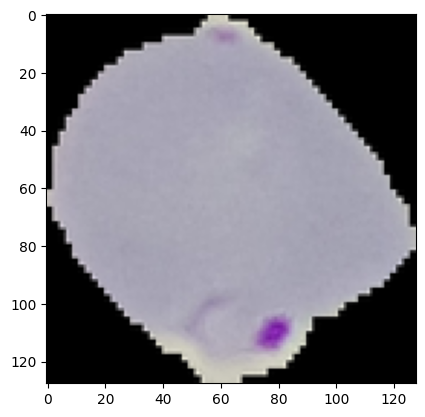

In [78]:
#Anomaly image verification
num=random.randint(0,len(para_file_paths)-1)
check_anomaly(para_file_paths[num])

1/1 [==============================] - 0s 31ms/step - loss: 0.0038 - mse: 0.0038
The image is NOT an anomaly


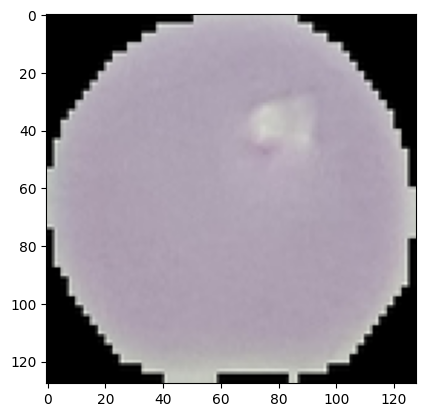

In [65]:
#Good/normal image verification
num=random.randint(0,len(uninfected_file_paths)-1)
check_anomaly(uninfected_file_paths[num])

In [66]:
#Save the model
model.save('cell_anomaly_detection.h5')

C:\Users\Januka\miniconda3\envs\tfvenv\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [67]:
model.save('my_model.keras')

In [68]:
#Save the model
encoder_model.save('cell_anomaly_detection_encoder.h5')